In [6]:
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# 1

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Atividades/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [12]:
x = df.drop(columns='Potability')
y = df['Potability']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [14]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

In [15]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
379,9.443359,73.492234,20438.224690,8.024953,315.805659,458.677231,12.538681,50.852470,3.486646
109,8.419971,185.718989,13237.989605,3.998266,308.142639,463.647277,17.209565,48.783112,3.962478
2682,7.514836,215.439523,17017.429960,7.417041,335.652454,483.658028,14.532854,66.037246,4.299732
196,9.868878,214.166235,15326.855914,3.351598,297.084174,424.292831,19.188441,70.070514,3.355490
792,3.940125,163.171653,25911.321680,4.138540,371.967180,487.985185,17.751705,63.612403,3.478005
...,...,...,...,...,...,...,...,...,...
2833,8.149437,220.203735,23978.107683,7.384126,360.414005,461.804548,13.364677,103.380210,4.949257
2767,7.635265,205.067631,17796.374638,7.156738,306.800286,370.561027,17.486815,32.920720,3.948304
465,5.445326,201.379459,28001.118179,7.208946,331.587484,365.091587,11.788777,65.944566,3.946990
821,5.226942,177.319603,28398.554196,6.294517,336.292918,328.387430,18.463095,62.075902,2.259550


In [16]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       300
           1       0.58      0.49      0.53       203

    accuracy                           0.65       503
   macro avg       0.64      0.63      0.63       503
weighted avg       0.65      0.65      0.65       503



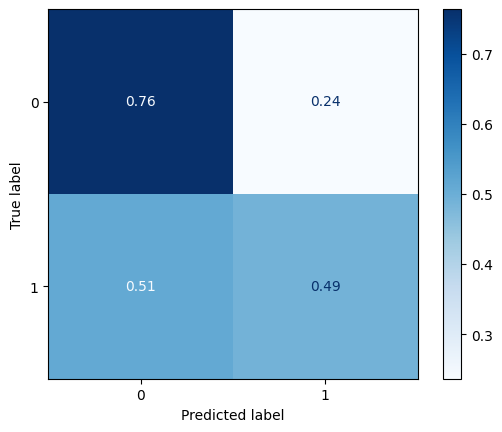

In [18]:
ConfusionMatrixDisplay.from_estimator(xgb_model, x_test, y_test, normalize='true', cmap='Blues')

# 2

In [19]:
dmatrix = xgb.DMatrix(data=x, label=y)

In [20]:
params = {'objective': 'binary:logistic'}

In [21]:
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=2024, 
                    early_stopping_rounds=5, metrics='error', as_pandas=True, seed=42)

In [22]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.323719,0.005560,0.363504,0.004166
1,0.267034,0.006453,0.344112,0.023386
2,0.252860,0.004065,0.339642,0.023903
3,0.232223,0.004667,0.340135,0.011899
4,0.221533,0.007958,0.342624,0.013617
5,0.209103,0.008389,0.338148,0.011740
6,0.189209,0.004889,0.333169,0.003256
7,0.165839,0.009808,0.328694,0.009528


In [23]:
1 - cv_results['test-error-mean'].iloc[-1]

0.6713059145405609

In [24]:
params_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimator': [10, 25, 50],
    'max_depth': [2, 5, 10],
    'colsample_bytree': [0.1, 0.5, 1]
}

In [25]:
xgb_model_grid = xgb.XGBClassifier()

In [26]:
grid_search_cv = GridSearchCV(estimator=xgb_model_grid, param_grid=params_grid, cv=4, 
                              scoring='accuracy')

In [27]:
grid_search_cv.fit(x, y)

c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 5, 10], 'n_estimator': [10, 25, 50]},
             scoring='accuracy')

In [29]:
grid_search_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimator': 10}

In [30]:
grid_search_cv.best_score_

0.607179631375096

In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)

# X_balanceado, y_balanceado = sm.fit_resample(X_treino, y_treino)